In [1]:
import geopandas as gpd
# agrega el codigo que apaga todos los warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = gpd.read_file('data/grid_combined.geojson')

In [3]:
data['LEGOS'] = data['altura_total_reescalada'].astype(int)

In [ ]:
data.set_crs('EPSG:4326', inplace=True)
pass

In [6]:
import os
filename = 'data/grid_combined'

# check if filename or directory exists, if exists, delete it
if os.path.exists(filename):
    if os.path.isdir(filename):
        import shutil
        shutil.rmtree(filename)

if filename.endswith('.geojson'):
    data.to_file(filename, driver='GeoJSON')
elif filename.endswith('.parquet'):
    data.to_parquet(filename)
else:
    data.to_file(filename)

<Axes: >

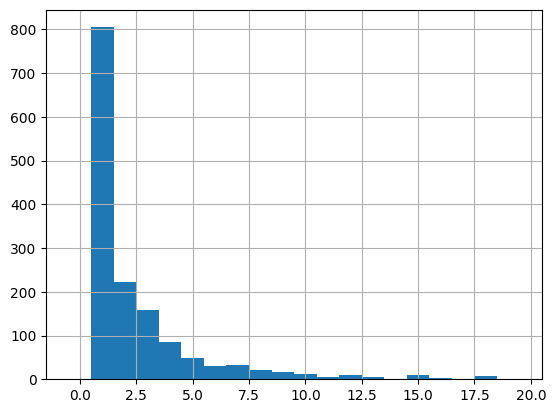

In [17]:
import numpy as np
data["LEGOS"].hist(bins=np.arange(0, data["LEGOS"].max(), 1)-0.5)

In [37]:
import imageio
import matplotlib.pyplot as plt

# umbral = 10
# data['plot'] = (data['LEGOS'] >= umbral).astype(int)
# data.plot(column='plot', cmap='binary_r', legend=True, figsize=(10, 10), edgecolor='red', linewidth=0.25)
# Create a list to store the images
images = []

# Generate frames for each umbral value
for umbral in range(-1, data['LEGOS'].max() + 1):
    data['plot'] = (data['LEGOS'] >= umbral).astype(int)
    fig, ax = plt.subplots(1, 1, figsize=(20, 20))
    data.plot(column='plot', cmap='binary_r', legend=True, ax=ax, edgecolor='red', linewidth=0.25)
    plt.title(f'Umbral: {umbral}')
    plt.savefig(f'frame_{umbral}.png')
    plt.close(fig)
    images.append(imageio.imread(f'frame_{umbral}.png'))

# Save the images as a gif
imageio.mimsave('/app/data/umbral_animation.gif', images, duration=2, loop=0)

# Clean up the generated frames
for umbral in range(0, data['LEGOS'].max() + 1):
    os.remove(f'frame_{umbral}.png')